In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
df_train = pd.read_csv("Train.csv")

In [3]:
df_test = pd.read_csv("Test.csv")

In [4]:
df_train["source"] = 'train'

In [5]:
df_test["source"]='test'

In [6]:
df_train.shape

(29451, 13)

In [7]:
df_test.shape

(68720, 12)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
 12  source                 29451 non-null  object 
dtypes: float64(4), int64(5), object(4)
memory usage: 2.9+ MB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68720 entries, 0 to 68719
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSTED_BY           68720 non-null  object 
 1   UNDER_CONSTRUCTION  68720 non-null  int64  
 2   RERA                68720 non-null  int64  
 3   BHK_NO.             68720 non-null  int64  
 4   BHK_OR_RK           68720 non-null  object 
 5   SQUARE_FT           68720 non-null  float64
 6   READY_TO_MOVE       68720 non-null  int64  
 7   RESALE              68720 non-null  int64  
 8   ADDRESS             68720 non-null  object 
 9   LONGITUDE           68720 non-null  float64
 10  LATITUDE            68720 non-null  float64
 11  source              68720 non-null  object 
dtypes: float64(3), int64(5), object(4)
memory usage: 6.3+ MB


In [10]:
df_train.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [11]:
df_test.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
count,68720.000000,68720.000000,68720.000000,6.872000e+04,68720.000000,68720.000000,68720.000000,68720.000000
mean,0.176557,0.316531,2.388198,2.762419e+03,0.823443,0.933498,21.288045,76.919388
std,0.381296,0.465126,0.864577,1.640991e+05,0.381296,0.249159,6.179034,10.100950
min,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,-38.391261,-118.354100
25%,0.000000,0.000000,2.000000,9.000310e+02,1.000000,1.000000,18.452663,73.798100
50%,0.000000,0.000000,2.000000,1.174982e+03,1.000000,1.000000,20.933260,77.324966
75%,0.000000,1.000000,3.000000,1.550265e+03,1.000000,1.000000,26.888396,78.000723
max,1.000000,1.000000,31.000000,4.016393e+07,1.000000,1.000000,65.183330,175.278040


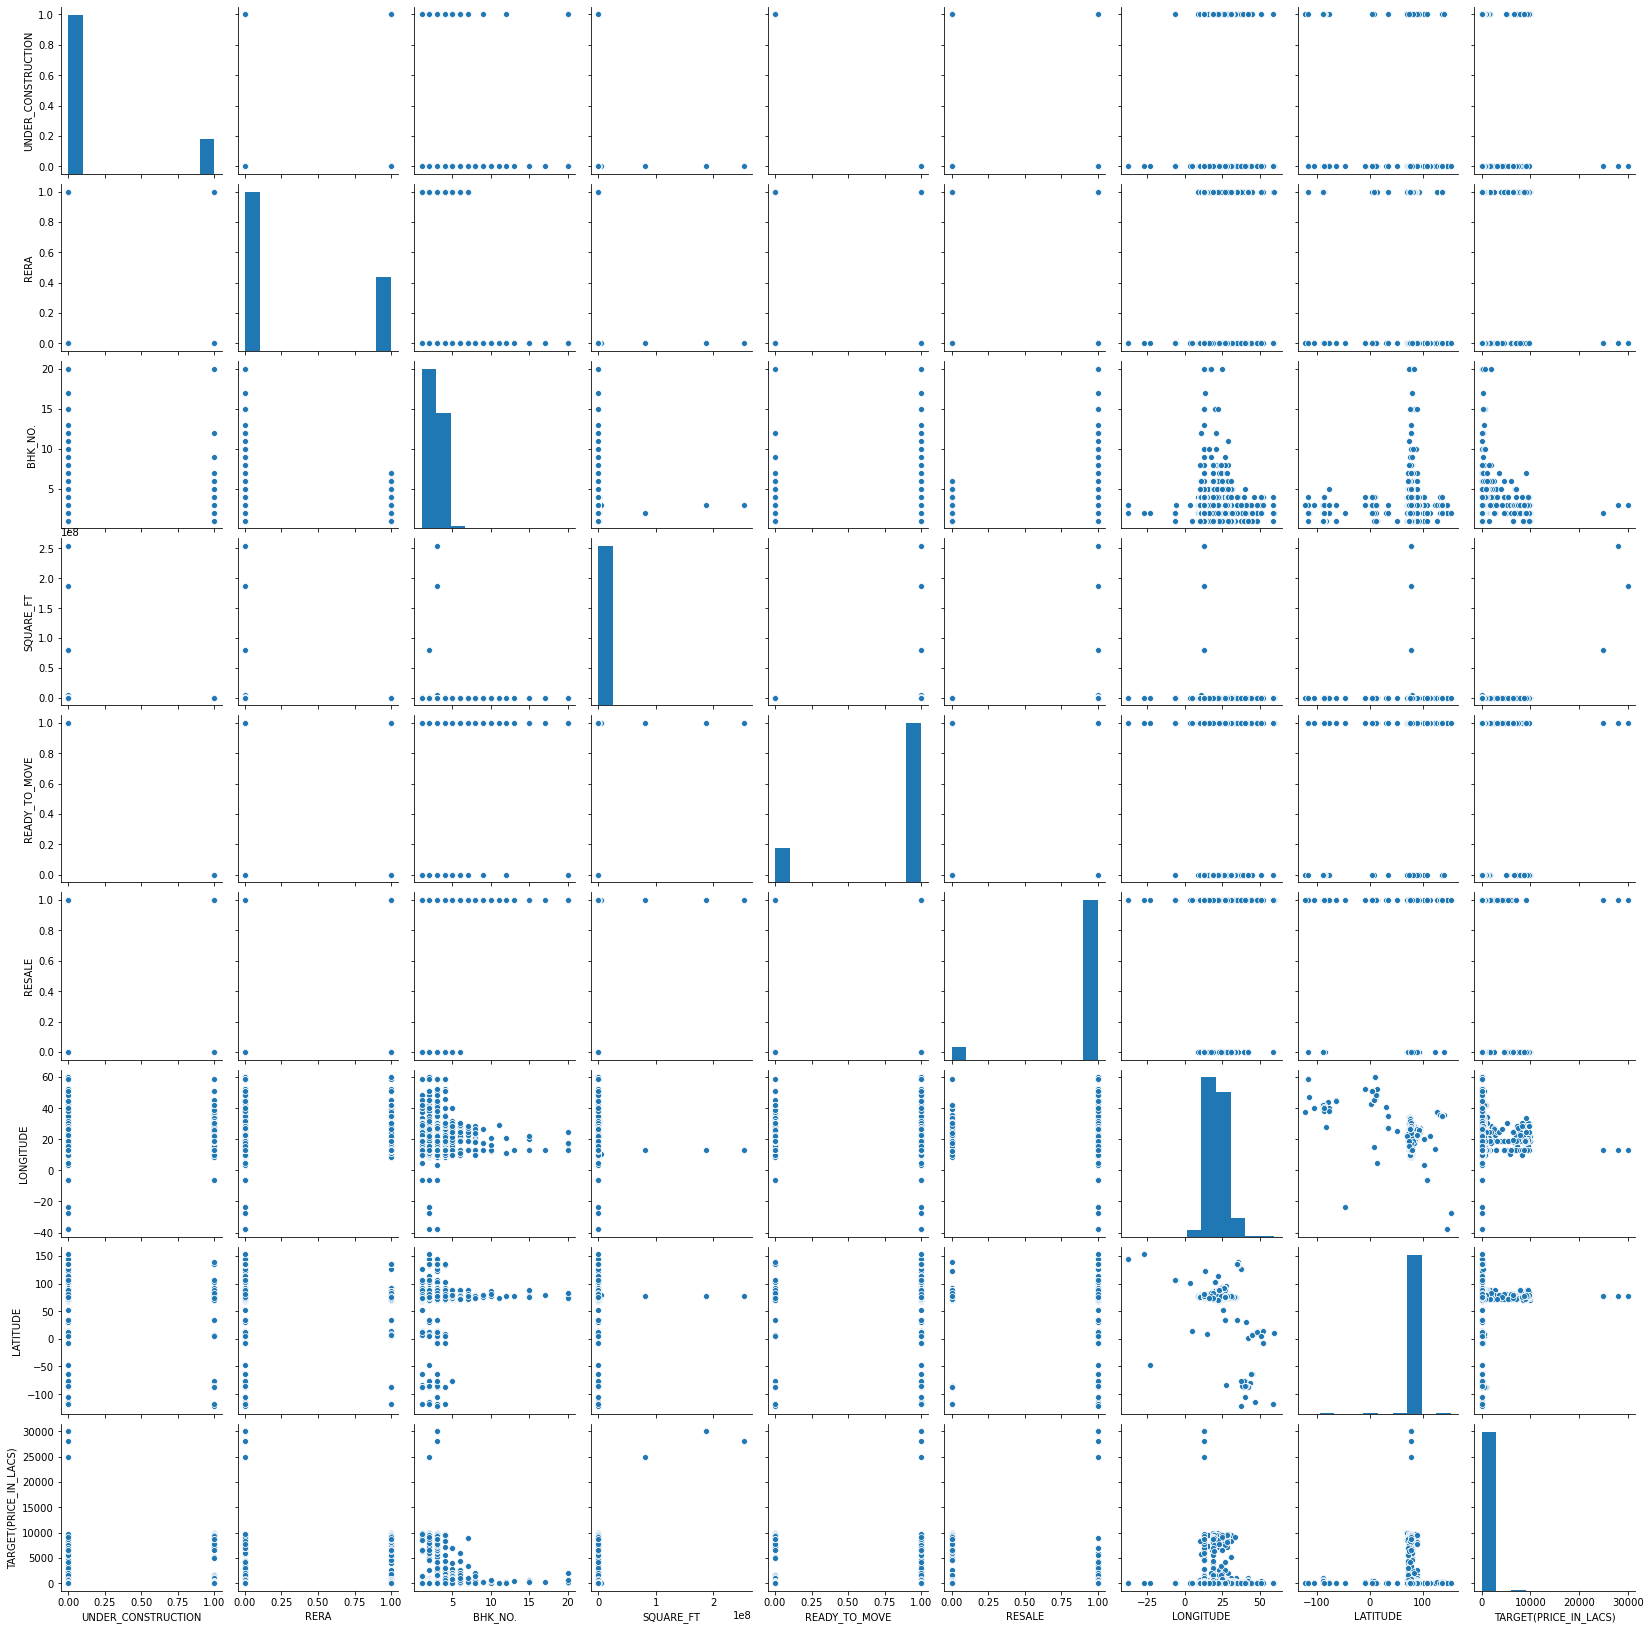

In [12]:
sns.pairplot(df_train)

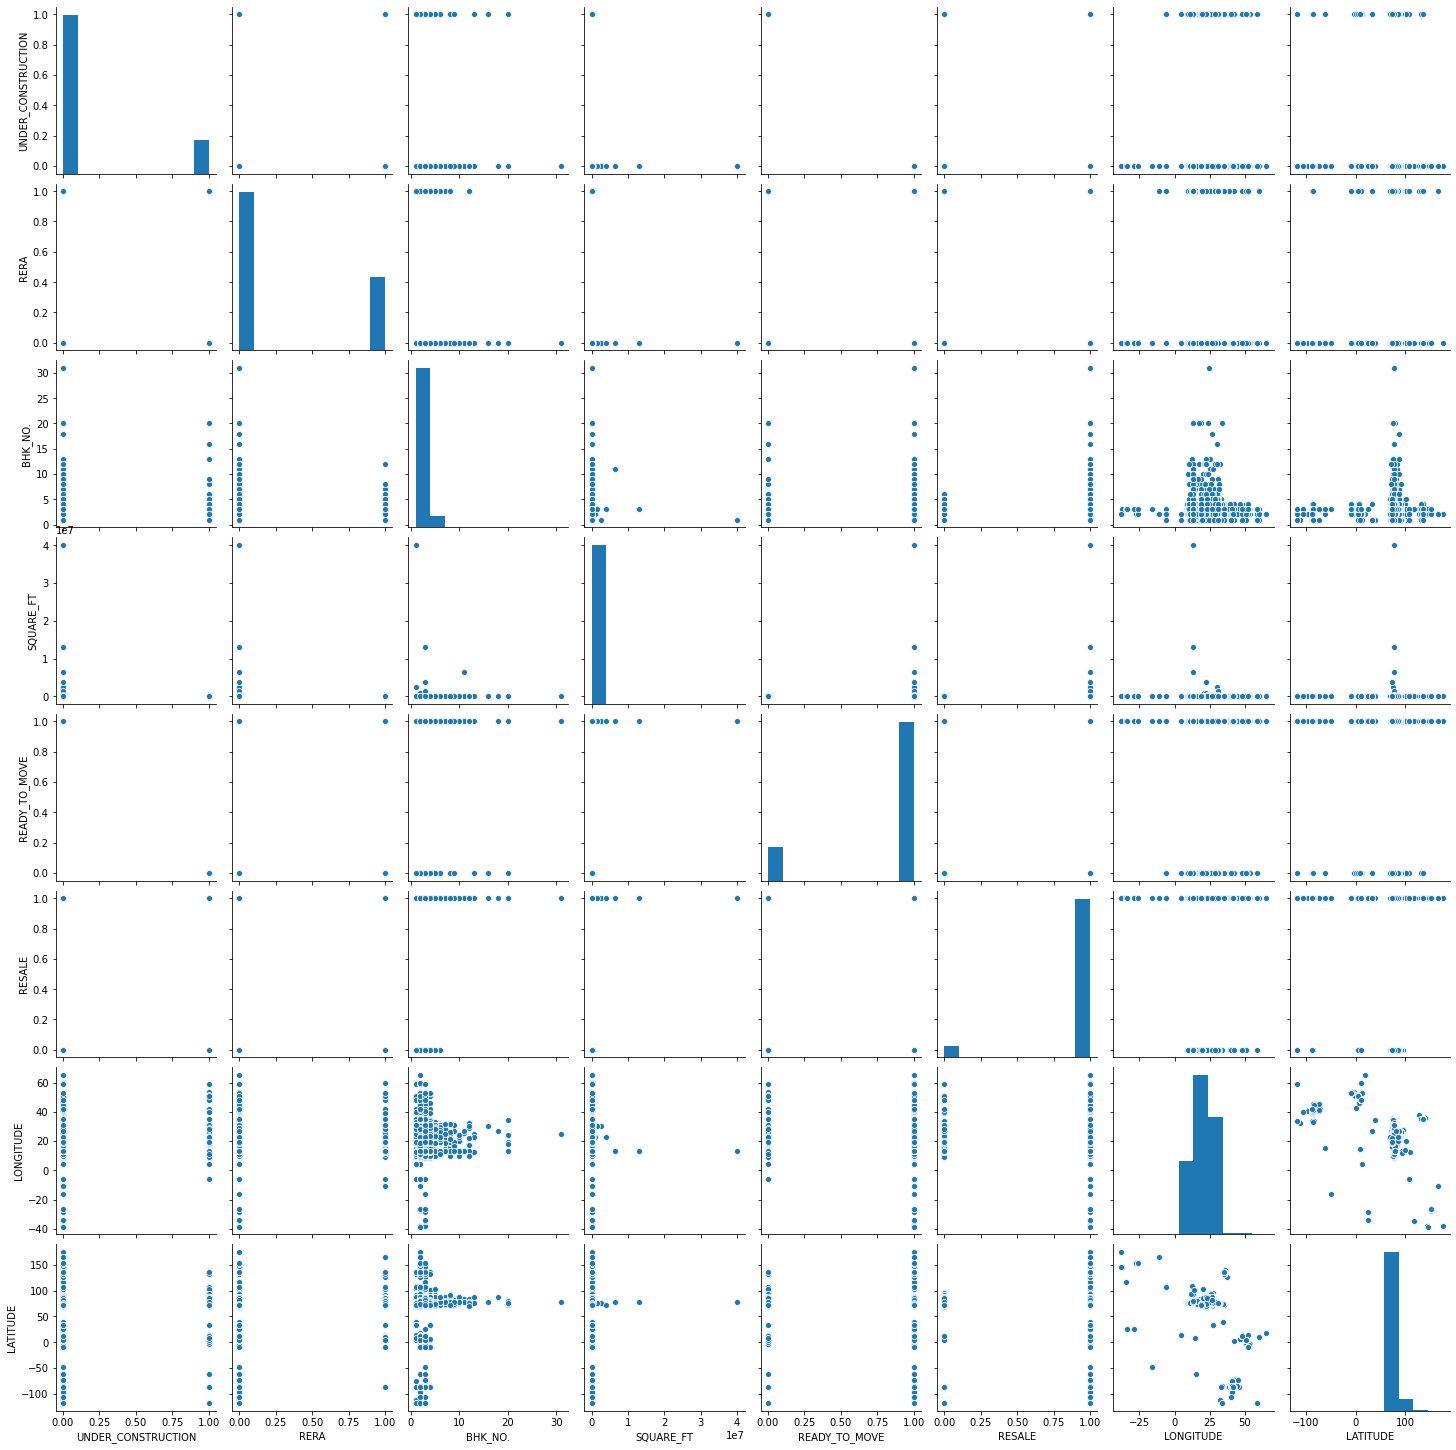

In [13]:
sns.pairplot(df_test)

In [14]:
df_train.corr()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
UNDER_CONSTRUCTION,1.000000,0.363826,-0.040712,-0.004204,-1.000000,-0.347405,0.006440,-0.000381,0.055399
RERA,0.363826,1.000000,0.009547,-0.006229,-0.363826,-0.270351,0.104976,-0.065106,0.067636
BHK_NO.,-0.040712,0.009547,1.000000,0.005303,0.040712,0.014581,0.068730,0.046930,0.112283
SQUARE_FT,-0.004204,-0.006229,0.005303,1.000000,0.004204,0.001732,-0.012591,0.000803,0.402685
READY_TO_MOVE,-1.000000,-0.363826,0.040712,0.004204,1.000000,0.347405,-0.006440,0.000381,-0.055399
RESALE,-0.347405,-0.270351,0.014581,0.001732,0.347405,1.000000,0.024038,0.014844,-0.207378
LONGITUDE,0.006440,0.104976,0.068730,-0.012591,-0.006440,0.024038,1.000000,-0.155062,-0.031112
LATITUDE,-0.000381,-0.065106,0.046930,0.000803,0.000381,0.014844,-0.155062,1.000000,-0.017254
TARGET(PRICE_IN_LACS),0.055399,0.067636,0.112283,0.402685,-0.055399,-0.207378,-0.031112,-0.017254,1.000000


In [15]:
df_test.corr()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
UNDER_CONSTRUCTION,1.000000,0.363535,-0.034652,0.000070,-1.000000,-0.353852,0.011269,0.003482
RERA,0.363535,1.000000,0.009514,-0.001614,-0.363535,-0.276305,0.103211,-0.071801
BHK_NO.,-0.034652,0.009514,1.000000,0.005038,0.034652,0.008651,0.069663,0.050921
SQUARE_FT,0.000070,-0.001614,0.005038,1.000000,-0.000070,-0.006936,-0.006316,0.000296
READY_TO_MOVE,-1.000000,-0.363535,0.034652,-0.000070,1.000000,0.353852,-0.011269,-0.003482
RESALE,-0.353852,-0.276305,0.008651,-0.006936,0.353852,1.000000,0.016227,0.009850
LONGITUDE,0.011269,0.103211,0.069663,-0.006316,-0.011269,0.016227,1.000000,-0.143010
LATITUDE,0.003482,-0.071801,0.050921,0.000296,-0.003482,0.009850,-0.143010,1.000000


In [16]:
df_train["BHK_NO."].unique()

array([ 2,  3,  1,  4,  5,  6, 12,  8, 20, 10,  7,  9, 13, 17, 15, 11],
      dtype=int64)

In [17]:
df_train["BHK_NO."].value_counts()

2     13324
3     10546
1      3574
4      1723
5       190
6        52
7        11
8        10
15        4
10        4
20        4
12        3
9         3
13        1
11        1
17        1
Name: BHK_NO., dtype: int64

In [18]:
df_train[df_train.duplicated()]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),source
1904,Dealer,1,0,3,BHK,1209.628644,0,1,"Salt Lake,Kolkata",22.541110,88.337780,100.0,train
2351,Dealer,0,0,2,BHK,896.680112,1,1,"Zirakpur,Chandigarh",30.662283,76.822397,28.9,train
2611,Dealer,0,0,3,BHK,1350.256549,1,1,"Sector 78 Faridabad,Faridabad",28.380160,77.369936,50.0,train
2618,Dealer,1,0,2,BHK,800.000000,0,1,"Chandapura,Bangalore",12.800090,77.711820,27.0,train
3211,Owner,0,0,2,BHK,712.105799,1,1,"BataNagar,Kolkata",22.506860,88.223965,35.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29321,Dealer,0,1,1,BHK,649.641577,1,1,"Zirakpur,Chandigarh",30.662283,76.822397,14.5,train
29345,Dealer,1,1,3,BHK,1563.155686,0,1,"Sector-88 Mohali,Mohali",30.684523,76.691728,74.5,train
29357,Owner,0,1,3,BHK,1446.201311,1,1,"Sector-70 Noida,Noida",28.596320,77.381430,75.0,train
29389,Builder,1,0,3,BHK,979.290979,0,0,"Barasat,Kolkata",22.747639,88.600902,27.9,train


In [19]:
df_test[df_test.duplicated()]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,source
150,Owner,0,0,2,BHK,1304.347826,1,1,"Sector 88 Faridabad,Faridabad",28.431862,77.351104,test
631,Dealer,0,1,2,BHK,820.232399,1,1,"Pholriwal,Jalandhar",31.261414,75.589997,test
1165,Dealer,0,1,2,BHK,1250.000000,1,1,"Banashankari Stage V,Bangalore",12.922300,77.553200,test
1457,Dealer,0,1,3,BHK,1724.137931,1,1,"Kundalahalli,Bangalore",12.970450,77.712284,test
1897,Owner,1,1,2,BHK,1250.000000,0,1,"Milakpur Goojar,Bhiwadi",28.194910,76.826552,test
...,...,...,...,...,...,...,...,...,...,...,...,...
68626,Dealer,0,0,4,BHK,2050.345108,1,1,"Sector-15 Bahadurgarh,Bahadurgarh",30.752321,76.772816,test
68662,Owner,0,0,2,BHK,1045.068583,1,1,"Sector-137 Noida,Noida",28.506454,77.409568,test
68685,Dealer,0,1,2,BHK,341.933478,1,0,"Purseni,Lucknow",26.707154,80.982346,test
68698,Dealer,1,1,3,BHK,1284.615385,0,0,"Sector-150 Noida,Noida",28.429614,77.481711,test


In [20]:
df_test["BHK_NO."].value_counts()

2     30998
3     24756
1      8383
4      4001
5       394
6       106
7        17
8        15
9        13
12       13
10        8
20        6
11        4
13        3
16        1
18        1
31        1
Name: BHK_NO., dtype: int64

In [21]:
df_train.drop_duplicates(inplace=True,ignore_index=True)

In [22]:
df_train.shape

(29050, 13)

In [23]:
df_all=pd.concat([df_train,df_test])

In [24]:
df_all.shape

(97770, 13)

In [25]:
df_all.isna().sum()

POSTED_BY                    0
UNDER_CONSTRUCTION           0
RERA                         0
BHK_NO.                      0
BHK_OR_RK                    0
SQUARE_FT                    0
READY_TO_MOVE                0
RESALE                       0
ADDRESS                      0
LONGITUDE                    0
LATITUDE                     0
TARGET(PRICE_IN_LACS)    68720
source                       0
dtype: int64

In [26]:
df_train.shape

(29050, 13)

In [27]:
df_test.shape

(68720, 12)

In [28]:
df_all["SQUARE_FT"].value_counts()

1000.000000    1584
1250.000000     977
800.000000      639
1200.000000     611
1600.000000     406
               ... 
1306.884481       1
1236.232861       1
2163.727297       1
1278.916682       1
1089.845827       1
Name: SQUARE_FT, Length: 48733, dtype: int64

<AxesSubplot:>

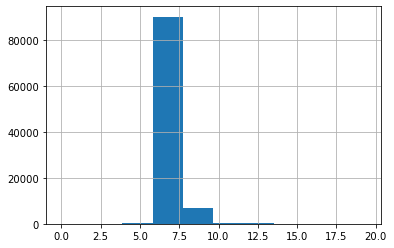

In [33]:
df_all["SQUARE_FT_LOG"].hist()

<AxesSubplot:xlabel='SQUARE_FT_LOG'>

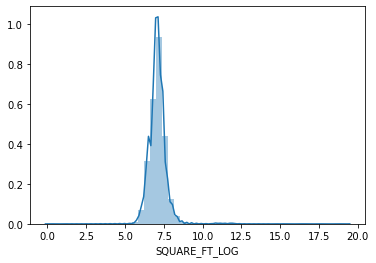

In [193]:
sns.distplot(df_all["SQUARE_FT_LOG"])

In [30]:
df_all["SQUARE_FT_LOG"] = df_all["SQUARE_FT"].map(lambda i: np.log(i) if i > 0 else 0) 
print(df_all["SQUARE_FT"].skew())
print(df_all["SQUARE_FT_LOG"].skew())

207.64225582423649
2.411268426072972


In [100]:
df_test.groupby("POSTED_BY")['SQUARE_FT'].max()

POSTED_BY
Builder    1.842718e+05
Dealer     3.469388e+05
Owner      4.016393e+07
Name: SQUARE_FT, dtype: float64

In [34]:
df_all.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)', 'source', 'SQUARE_FT_LOG'],
      dtype='object')

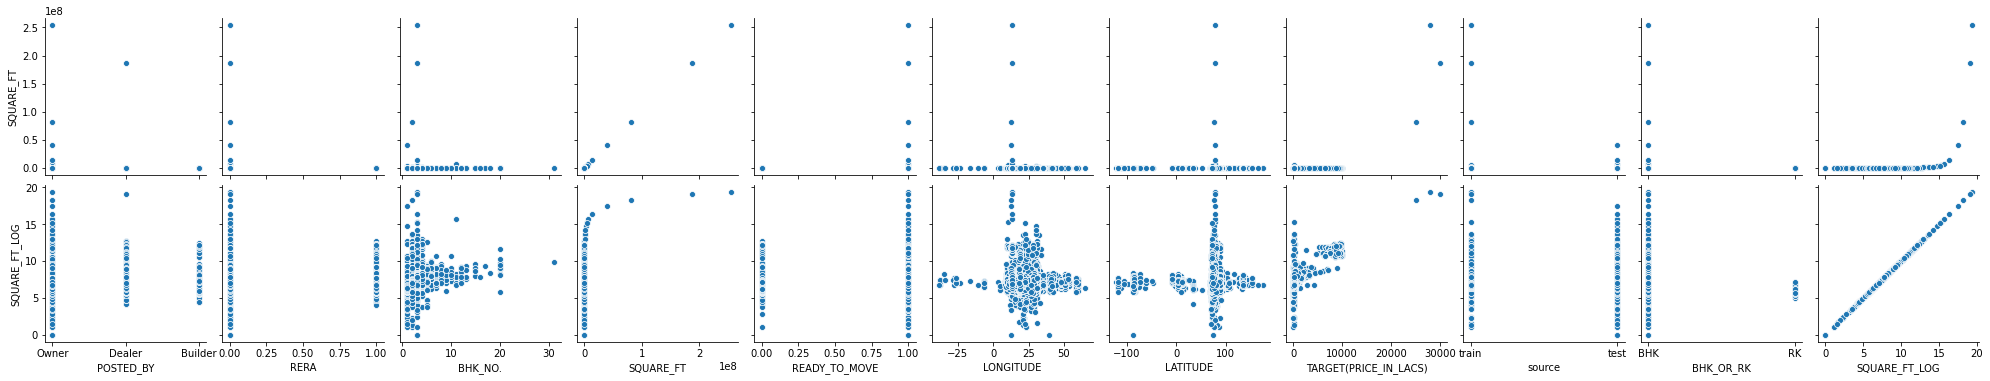

In [36]:
sns.pairplot(df_all, y_vars= [ 'SQUARE_FT', 
       'SQUARE_FT_LOG'], x_vars= ['POSTED_BY', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE',
       'LONGITUDE', 'LATITUDE', 'TARGET(PRICE_IN_LACS)', 'source', 
        'BHK_OR_RK', 'SQUARE_FT_LOG'])

In [37]:
df_all["RESALE"].value_counts()

1    91177
0     6593
Name: RESALE, dtype: int64

In [38]:
# Since 91000 out of 97770 records are having values as 1 so the influence is minimal, so dropping this col
df_all.drop(columns=['RESALE'],inplace=True)

In [134]:
# Multi collinearity check is failing for RESALE Longitude & Latitude columns as the VIF values are > 10. But Longitude & Latitude is related to the address, so ignoring the same

In [39]:
x=df_all.select_dtypes(include=np.number).drop(columns=["TARGET(PRICE_IN_LACS)"])
vif_data = pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

              feature         VIF
0  UNDER_CONSTRUCTION   50.638311
1                RERA    1.173326
2             BHK_NO.    1.758414
3           SQUARE_FT    1.025417
4       READY_TO_MOVE  232.672780
5           LONGITUDE    1.038261
6            LATITUDE    1.030017
7       SQUARE_FT_LOG    1.779406


In [41]:
# Since SQUARE_FT is logrithmically transformed, we are dropping this column
df_all.drop(columns=['SQUARE_FT'],inplace=True)

In [32]:
# UNDER_CONSTRUCTION & READY_TO_MOVE are mutually exclusive, so we can remove one of the columns 

In [42]:
df_all.drop(columns=['READY_TO_MOVE'],inplace=True)

KeyError: "['READY_TO_MOVE'] not found in axis"

In [43]:
df_all.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),source,SQUARE_FT_LOG
0,Owner,0,0,2,BHK,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,train,7.170301
1,Dealer,0,0,2,BHK,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,train,7.150701
2,Owner,0,0,2,BHK,"Jigani,Bangalore",12.778033,77.632191,43.0,train,6.838576
3,Owner,0,1,2,BHK,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,train,6.835100
4,Dealer,1,0,2,BHK,"New Town,Kolkata",22.592200,88.484911,60.5,train,6.906764


In [138]:
#df_train[(df_train["UNDER_CONSTRUCTION"]==1) & (df_train["READY_TO_MOVE"]==1)]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),source


In [139]:
#df_train[(df_train["UNDER_CONSTRUCTION"]==0) & (df_train["READY_TO_MOVE"]==0)]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),source


In [38]:
#df_train["NOT_READY_TO_MOVE_AND_NEW_SALE"]=np.where((df_train["READY_TO_MOVE"]==0) & (df_train["RESALE"]==0),1,0)

In [39]:
#df_train["READY_TO_MOVE_AND_RESALE"]=np.where((df_train["READY_TO_MOVE"]==1) & (df_train["RESALE"]==1),1,0)

In [40]:
#df_train["READY_TO_MOVE_AND_NEW_SALE"]=np.where((df_train["READY_TO_MOVE"]==1) & (df_train["RESALE"]==0),1,0)

In [41]:
#df_train["NOT_READ_TO_MOVE_AND_RESALE"]=np.where((df_train["READY_TO_MOVE"]==0) & (df_train["RESALE"]==1),1,0)

In [42]:
#df_train=df_train.drop(columns=["READY_TO_MOVE","RESALE"])

In [44]:
df_all["POSTED_BY"].value_counts()

Dealer     60398
Owner      35390
Builder     1982
Name: POSTED_BY, dtype: int64

In [45]:
df_all['ADDRESS']

0                     Ksfc Layout,Bangalore
1                 Vishweshwara Nagar,Mysore
2                          Jigani,Bangalore
3               Sector-1 Vaishali,Ghaziabad
4                          New Town,Kolkata
                        ...                
68715                Thane West,Maharashtra
68716              Sector-66A Mohali,Mohali
68717                    Balkum,Maharashtra
68718                         Hadapsar,Pune
68719    Hiranandani Gardens - Powai,Mumbai
Name: ADDRESS, Length: 97770, dtype: object

In [46]:
def find_city(address):
    city = address.split(',')[-1]
    return city

In [47]:
df_all['ADDRESS'].apply(lambda x:find_city(x))

0          Bangalore
1             Mysore
2          Bangalore
3          Ghaziabad
4            Kolkata
            ...     
68715    Maharashtra
68716         Mohali
68717    Maharashtra
68718           Pune
68719         Mumbai
Name: ADDRESS, Length: 97770, dtype: object

In [48]:
df_all["CITY"]=df_all['ADDRESS'].apply(lambda x:find_city(x))

In [49]:
def find_locality(address):
    locality = address.split(',')[-2]
    return locality

In [50]:
df_all['LOCALITY']=df_all['ADDRESS'].apply(lambda x:find_locality(x))

In [52]:
df_all.drop(columns=['ADDRESS'],inplace=True)

KeyError: "['ADDRESS'] not found in axis"

In [53]:
df_all['BHK_RK']=np.where((df_all["BHK_OR_RK"]=='BHK'),1,0)

In [54]:
df_all.drop(columns=['BHK_OR_RK'],inplace=True)

In [60]:
df_all["BHK_RK"].value_counts()

1    97688
0       82
Name: BHK_RK, dtype: int64

In [61]:
df_all.corr()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),SQUARE_FT_LOG,BHK_RK
UNDER_CONSTRUCTION,1.000000,0.363758,-0.037019,0.009817,0.002137,0.054618,-0.050117,-0.019858
RERA,0.363758,1.000000,0.009178,0.103332,-0.069828,0.067314,0.028366,-0.005364
BHK_NO.,-0.037019,0.009178,1.000000,0.069071,0.049690,0.113654,0.649408,0.046288
LONGITUDE,0.009817,0.103332,0.069071,1.000000,-0.147207,-0.030505,0.035900,-0.008704
LATITUDE,0.002137,-0.069828,0.049690,-0.147207,1.000000,-0.017813,0.025077,-0.000101
TARGET(PRICE_IN_LACS),0.054618,0.067314,0.113654,-0.030505,-0.017813,1.000000,0.591350,0.004453
SQUARE_FT_LOG,-0.050117,0.028366,0.649408,0.035900,0.025077,0.591350,1.000000,0.059293
BHK_RK,-0.019858,-0.005364,0.046288,-0.008704,-0.000101,0.004453,0.059293,1.000000


In [62]:
df_all_category_cols=df_all.select_dtypes(exclude=np.number).columns
df_all_num_cols = df_all.select_dtypes(include=np.number).columns

In [63]:
df_all_category_cols

Index(['POSTED_BY', 'source', 'CITY', 'LOCALITY'], dtype='object')

In [64]:
df_all_num_cols

Index(['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'LONGITUDE', 'LATITUDE',
       'TARGET(PRICE_IN_LACS)', 'SQUARE_FT_LOG', 'BHK_RK'],
      dtype='object')

In [73]:
df_all.groupby(by='CITY').CITY.value_counts().sort_values().head(60)

CITY           CITY         
Bangalore      Bangalore        14273
Lalitpur       Lalitpur         10033
Pune           Pune              6580
Mumbai         Mumbai            6522
Kolkata        Kolkata           5827
Noida          Noida             5777
Maharashtra    Maharashtra       5250
Chennai        Chennai           4126
Ghaziabad      Ghaziabad         3587
Jaipur         Jaipur            3217
Chandigarh     Chandigarh        2150
Faridabad      Faridabad         2103
Mohali         Mohali            1859
Vadodara       Vadodara          1852
Surat          Surat             1445
Gurgaon        Gurgaon           1369
Lucknow        Lucknow           1168
Nagpur         Nagpur            1130
Indore         Indore             963
Kochi          Kochi              726
Bhubaneswar    Bhubaneswar        692
Bhopal         Bhopal             675
Bhiwadi        Bhiwadi            597
Goa            Goa                573
Visakhapatnam  Visakhapatnam      564
Coimbatore     Coimba

In [74]:
df_all['LOCALITY'].value_counts().head(60)

Zirakpur                    1704
Raj Nagar Extension          728
Whitefield                   670
Thane West                   594
Mulund (West)                505
Kolshet Road                 504
Ghodbunder Road              496
Sector-137 Noida             467
New Town                     462
Kharghar                     461
Rajarhat                     458
Hiranandani Estate           441
Kandivali (East)             418
Jagatpura                    399
Kanjur Marg (East)           386
Chembur (East)               364
Noida Extension              359
Chembur                      356
Mira Road                    350
Sector-75 Noida              345
Balkum                       342
Sector 86 Faridabad          333
Baner                        333
Goregaon (East)              330
Sector-150 Noida             328
Thanisandra                  327
Mira Road East               321
Ajmer Road                   311
Sarjapur Road                306
Dombivli (East)              304
Manpada   

In [75]:
data_to_encode = df_all[df_all_category_cols].drop(columns=['source','CITY','LOCALITY'])

In [76]:
df_all.shape

(97770, 12)

In [77]:
df_category_encode = pd.get_dummies(data_to_encode)

In [78]:
df_final = pd.concat([df_category_encode,df_all[df_all_num_cols],df_all[["source",'CITY','LOCALITY']]],axis=1)

In [79]:
df_train_preprocessed=df_final[df_final['source']=='train']

In [80]:
del df_train_preprocessed['source']

In [81]:
df_train_preprocessed.shape

(29050, 13)

In [82]:
df_test_preprocessed=df_final[df_final['source']=='test']

In [83]:
del df_test_preprocessed['source']

In [84]:
df_test_preprocessed.shape

(68720, 13)

In [85]:
df_train_preprocessed.to_csv("train_housing_price_preprocessed.csv",index=False)
df_test_preprocessed.to_csv("test_housing_price_preprocessed.csv",index=False)

In [86]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97770 entries, 0 to 68719
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              97770 non-null  object 
 1   UNDER_CONSTRUCTION     97770 non-null  int64  
 2   RERA                   97770 non-null  int64  
 3   BHK_NO.                97770 non-null  int64  
 4   LONGITUDE              97770 non-null  float64
 5   LATITUDE               97770 non-null  float64
 6   TARGET(PRICE_IN_LACS)  29050 non-null  float64
 7   source                 97770 non-null  object 
 8   SQUARE_FT_LOG          97770 non-null  float64
 9   CITY                   97770 non-null  object 
 10  LOCALITY               97770 non-null  object 
 11  BHK_RK                 97770 non-null  int32  
dtypes: float64(4), int32(1), int64(3), object(4)
memory usage: 9.3+ MB


In [90]:
df_train_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29050 entries, 0 to 29049
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY_Builder      29050 non-null  uint8  
 1   POSTED_BY_Dealer       29050 non-null  uint8  
 2   POSTED_BY_Owner        29050 non-null  uint8  
 3   UNDER_CONSTRUCTION     29050 non-null  int64  
 4   RERA                   29050 non-null  int64  
 5   BHK_NO.                29050 non-null  int64  
 6   LONGITUDE              29050 non-null  float64
 7   LATITUDE               29050 non-null  float64
 8   TARGET(PRICE_IN_LACS)  29050 non-null  float64
 9   SQUARE_FT_LOG          29050 non-null  float64
 10  BHK_RK                 29050 non-null  int32  
 11  CITY                   29050 non-null  object 
 12  LOCALITY               29050 non-null  object 
dtypes: float64(4), int32(1), int64(3), object(2), uint8(3)
memory usage: 2.4+ MB


In [87]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97770 entries, 0 to 68719
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY_Builder      97770 non-null  uint8  
 1   POSTED_BY_Dealer       97770 non-null  uint8  
 2   POSTED_BY_Owner        97770 non-null  uint8  
 3   UNDER_CONSTRUCTION     97770 non-null  int64  
 4   RERA                   97770 non-null  int64  
 5   BHK_NO.                97770 non-null  int64  
 6   LONGITUDE              97770 non-null  float64
 7   LATITUDE               97770 non-null  float64
 8   TARGET(PRICE_IN_LACS)  29050 non-null  float64
 9   SQUARE_FT_LOG          97770 non-null  float64
 10  BHK_RK                 97770 non-null  int32  
 11  source                 97770 non-null  object 
 12  CITY                   97770 non-null  object 
 13  LOCALITY               97770 non-null  object 
dtypes: float64(4), int32(1), int64(3), object(3), uint8(3)

In [89]:
df_test_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68720 entries, 0 to 68719
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY_Builder      68720 non-null  uint8  
 1   POSTED_BY_Dealer       68720 non-null  uint8  
 2   POSTED_BY_Owner        68720 non-null  uint8  
 3   UNDER_CONSTRUCTION     68720 non-null  int64  
 4   RERA                   68720 non-null  int64  
 5   BHK_NO.                68720 non-null  int64  
 6   LONGITUDE              68720 non-null  float64
 7   LATITUDE               68720 non-null  float64
 8   TARGET(PRICE_IN_LACS)  0 non-null      float64
 9   SQUARE_FT_LOG          68720 non-null  float64
 10  BHK_RK                 68720 non-null  int32  
 11  CITY                   68720 non-null  object 
 12  LOCALITY               68720 non-null  object 
dtypes: float64(4), int32(1), int64(3), object(2), uint8(3)
memory usage: 5.7+ MB


In [88]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68720 entries, 0 to 68719
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSTED_BY           68720 non-null  object 
 1   UNDER_CONSTRUCTION  68720 non-null  int64  
 2   RERA                68720 non-null  int64  
 3   BHK_NO.             68720 non-null  int64  
 4   BHK_OR_RK           68720 non-null  object 
 5   SQUARE_FT           68720 non-null  float64
 6   READY_TO_MOVE       68720 non-null  int64  
 7   RESALE              68720 non-null  int64  
 8   ADDRESS             68720 non-null  object 
 9   LONGITUDE           68720 non-null  float64
 10  LATITUDE            68720 non-null  float64
 11  source              68720 non-null  object 
dtypes: float64(3), int64(5), object(4)
memory usage: 6.3+ MB
